In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Question One

Reading Data in to the Python Environment

In [2]:
data=pd.read_excel(r"C:\Users\dell1\Downloads\iris (2).xls")

In [3]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.shape

(150, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Question 2

# Pre-Processing

# Missing Value Handling

Miising value detection

In [7]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

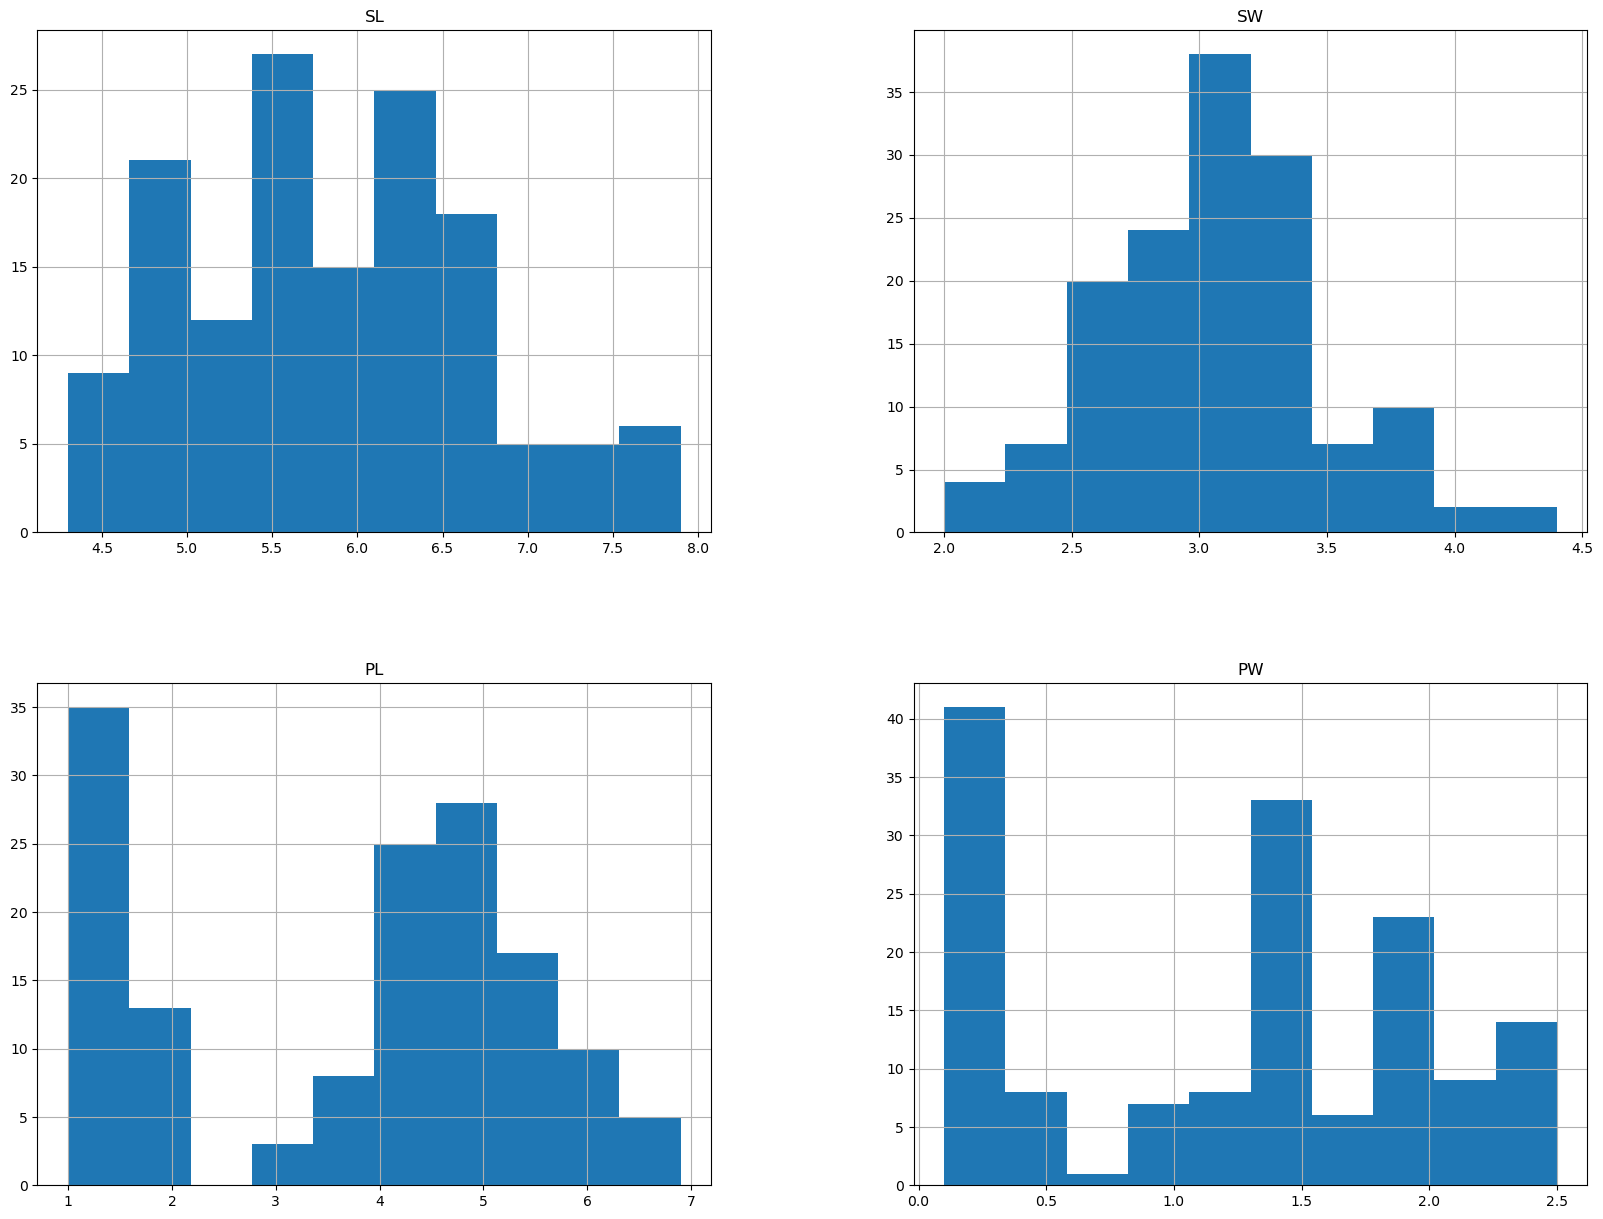

In [8]:
fregraph = data.select_dtypes(include=["float"])
fregraph.hist(figsize=(20,15))
plt.show()

Missing Value Handling

In [9]:
for col in["SL","SW","PL"]:
    data[col]=data[col].fillna(data[col].median())

In [10]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

Here we replaced the missing values by median

# Outliers

Outlier Detection

In [11]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [12]:
num_col=['SL', 'SW', 'PL', 'PW']

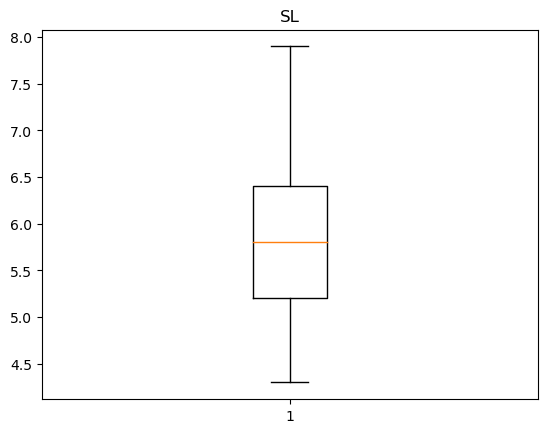

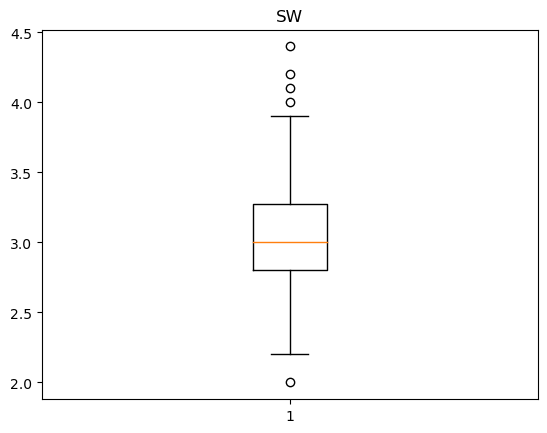

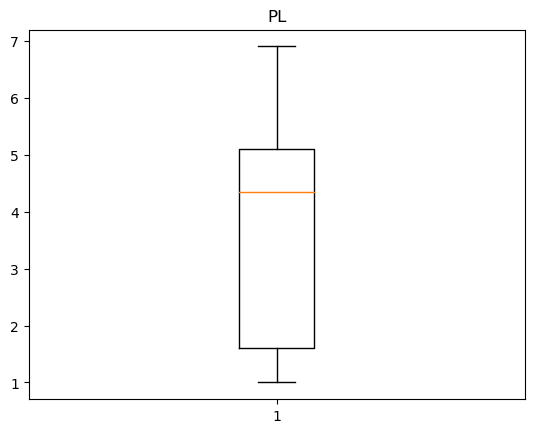

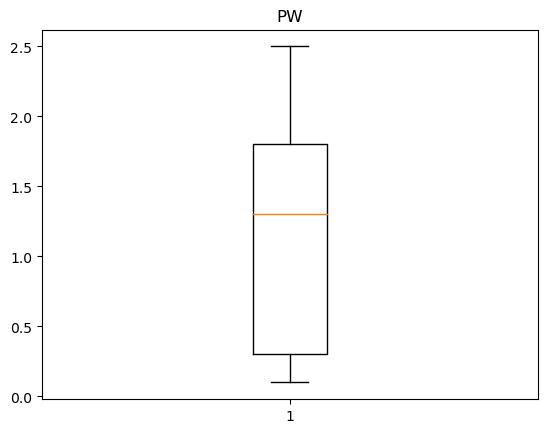

In [13]:
for i in num_col:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

Outlier Handling on SW

In [14]:
Q1 = np.percentile(data['SW'],25,method="midpoint")
Q2 = np.percentile(data['SW'],50,method="midpoint")
Q3 = np.percentile(data['SW'],75,method="midpoint")

In [15]:
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.25


In [16]:
IQR=Q3-Q1

In [17]:
upp_lim = Q3+1.5*IQR
low_lim = Q1-1.5*IQR

In [18]:
print(upp_lim)
print(low_lim)

3.9250000000000003
2.1249999999999996


In [19]:
data["SW"]=np.where(data["SW"]>upp_lim,upp_lim,np.where(data["SW"]<low_lim,low_lim,data["SW"]))

# Label Encoding

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le=LabelEncoder()

In [22]:
data["Classification"]=le.fit_transform(data["Classification"])

In [23]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Question 3

# Logistic Regression

In [24]:
x=data.drop(["Classification"],axis=1)

In [25]:
y=data["Classification"]

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [27]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred_lr=logit_model.predict(x_test)

C:\Users\dell1\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [29]:
print("Accuracy=",accuracy_score(y_test,y_pred_lr))
print("Precision=",precision_score(y_test,y_pred_lr,average="macro"))
print("recall_score=",recall_score(y_test,y_pred_lr,average="macro"))
print("f1_score=",f1_score(y_test,y_pred_lr,average="macro"))

Accuracy= 1.0
Precision= 1.0
recall_score= 1.0
f1_score= 1.0


In [30]:
confusion_matrix(y_test,y_pred_lr)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

# K-NN

In [31]:
from sklearn.neighbors import KNeighborsClassifier
metric = []
neighbors = np.arange(3,15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski',p=2)
    classifier.fit(x_train,y_train)
    y_pred_knn = classifier.predict(x_test)
    acc = accuracy_score(y_test,y_pred_knn)
    metric.append(acc)

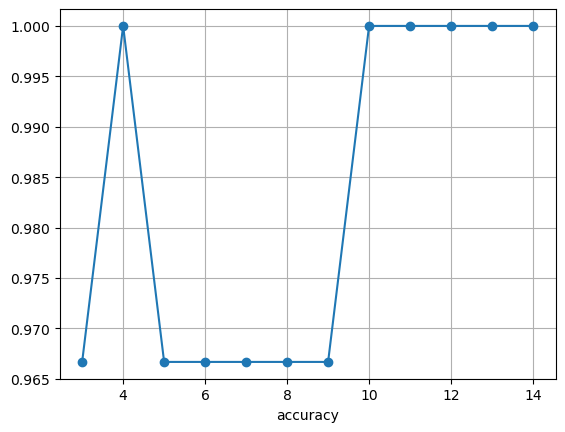

In [32]:
plt.plot(neighbors,metric,"o-")
plt.xlabel("kvalue")
plt.xlabel("accuracy")
plt.grid()

In [33]:
classifier = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski',p=2)
classifier.fit(x_train,y_train)
y_pred_knn = classifier.predict(x_test)

In [34]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print("Accuracy=",accuracy_score(y_test,y_pred_knn))
print("Precision=",precision_score(y_test,y_pred_knn,average="macro"))
print("recall_score=",recall_score(y_test,y_pred_knn,average="macro"))
print("f1_score=",f1_score(y_test,y_pred_knn,average="macro"))

Accuracy= 1.0
Precision= 1.0
recall_score= 1.0
f1_score= 1.0


In [35]:
confusion_matrix(y_test,y_pred_knn)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

# SVM

In [36]:
from sklearn.svm import SVC
svmclf=SVC(kernel="linear")
svmclf.fit(x_train,y_train)

SVC(kernel='linear')

In [37]:
y_pred=svmclf.predict(x_test)

In [38]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [39]:
print("Accuracy is:",accuracy_score(y_test,y_pred))

Accuracy is: 1.0


In [40]:
print(confusion_matrix(y_test,y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


# Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)
y_pred=dt_clf.predict(x_test)

In [42]:
print('Accuracy is:',accuracy_score(y_test,y_pred))

Accuracy is: 1.0


In [43]:
print(confusion_matrix(y_test,y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


# Random Forest Method

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier()
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [45]:
y_pred=rf_clf.predict(x_test)

In [46]:
print('Accuracy is:',accuracy_score(y_test,y_pred))

Accuracy is: 1.0


In [47]:
print(confusion_matrix(y_test,y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


We have to scale the data and compare the results

# Standard Scaling

In [48]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [49]:
x=std.fit_transform(x)

In [50]:
type(x)

numpy.ndarray

In [51]:
x2=pd.DataFrame(x,columns=["SL","SW","PL","PW"])

In [52]:
type(x2)

pandas.core.frame.DataFrame

In [53]:
x2.describe()

,SL,SW,PL,PW
count,1.500000e+02,1.500000e+02,150.000000,1.500000e+02
mean,-1.894781e-16,-2.605323e-16,0.000000,-2.842171e-16
std,1.003350e+00,1.003350e+00,1.003350,1.003350e+00
min,-1.927530e+00,-2.282244e+00,-1.612857,-1.444450e+00
25%,-8.107207e-01,-6.013769e-01,-1.264758,-1.181504e+00
50%,-6.618128e-02,-1.033422e-01,0.330694,1.332259e-01
75%,6.783581e-01,5.814555e-01,0.765817,7.905908e-01
max,2.539707e+00,2.200068e+00,1.810113,1.710902e+00


In [54]:
x2=pd.DataFrame(x,columns=["SL","SW","PL","PW"])

In [55]:
x=x2

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()

In [58]:
logit_model.fit(x_train,y_train)
y_pred_lr=logit_model.predict(x_test)

In [59]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [60]:
print("Accuracy=",accuracy_score(y_test,y_pred_lr))
print("Precision=",precision_score(y_test,y_pred_lr,average="macro"))
print("recall_score=",recall_score(y_test,y_pred_lr,average="macro"))
print("f1_score=",f1_score(y_test,y_pred_lr,average="macro"))

Accuracy= 0.9666666666666667
Precision= 0.9722222222222222
recall_score= 0.9629629629629629
f1_score= 0.9658994032395567


In [61]:
confusion_matrix(y_test,y_pred_lr)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

# K NN

In [62]:
from sklearn.neighbors import KNeighborsClassifier
metric = []
neighbors = np.arange(3,15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski',p=2)
    classifier.fit(x_train,y_train)
    y_pred_knn = classifier.predict(x_test)
    acc = accuracy_score(y_test,y_pred_knn)
    metric.append(acc)

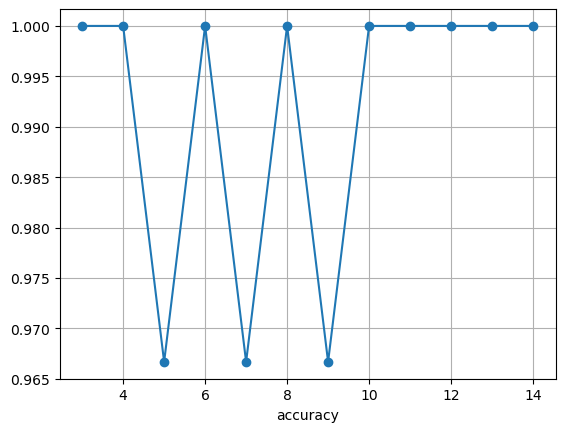

In [63]:
plt.plot(neighbors,metric,"o-")
plt.xlabel("kvalue")
plt.xlabel("accuracy")
plt.grid()

Here we are taking k value as 4. for all values we are getting same results in this data

In [64]:
classifier = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski',p=2)
classifier.fit(x_train,y_train)
y_pred_knn = classifier.predict(x_test)

In [65]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print("Accuracy=",accuracy_score(y_test,y_pred_knn))
print("Precision=",precision_score(y_test,y_pred_knn,average="macro"))
print("recall_score=",recall_score(y_test,y_pred_knn,average="macro"))
print("f1_score=",f1_score(y_test,y_pred_knn,average="macro"))

Accuracy= 1.0
Precision= 1.0
recall_score= 1.0
f1_score= 1.0


In [66]:
confusion_matrix(y_test,y_pred_knn)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

# SVM

In [67]:
from sklearn.svm import SVC
svmclf=SVC(kernel="linear")
svmclf.fit(x_train,y_train)

SVC(kernel='linear')

In [68]:
y_pred=svmclf.predict(x_test)

In [69]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [70]:
print("Accuracy is:",accuracy_score(y_test,y_pred))

Accuracy is: 0.9666666666666667


In [71]:
print(confusion_matrix(y_test,y_pred))

[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


# Decision Tree

In [72]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)
y_pred=dt_clf.predict(x_test)

In [73]:
print('Accuracy is:',accuracy_score(y_test,y_pred))

Accuracy is: 1.0


In [74]:
print(confusion_matrix(y_test,y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


# Random Forest

In [75]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier()
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [76]:
y_pred=rf_clf.predict(x_test)

In [77]:
print('Accuracy is:',accuracy_score(y_test,y_pred))

Accuracy is: 1.0


In [78]:
print(confusion_matrix(y_test,y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Here in this data we are instructed to do scaling. So after scaling we are getting accuracy one for KNN, Random Forest, Decision tree methods. SVM and Logistic regression getting accuracy less than 1.